In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reimport tensorflow as tf


tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

from time import time
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, LSTM, Embedding, Reshape, Input, Concatenate
from tensorflow.keras.callbacks import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import os, sys
import string

from urllib.request import urlretrieve

from collections import Counter
import datetime 
import calendar 

from python_utils import *

In [2]:
df = pd.read_csv('../DataSets/26_5_Final-Merged-File.csv', encoding='utf-8')

In [3]:
df.head(1)

,title,text,date,country,label,URL
0,A video shows a fortune teller predicting the...,Circulating on social networks a video that sh...,08-04-2020,Portugal,FALSE,https://observador.pt/factchecks/fact-check-um...


In [4]:
#dataframe with spatial and temporal information
df_nc = df

In [5]:
from dateutil import parser
import pandas as pd

cleanedDates = []

colm_list = ["title ","text","date","country","label","URL"]
x = 0
start = 1803
mid = 2168
while x<2901:
	if x >= mid:
		stre = df['date'][x]
		sd= parser.parse(stre)
		cleanedDates.append(sd.strftime("%d-%m-%Y"))
		print(x)
	if x >= start and x < mid:
		stre = df['date'][x]
		for i in stre.splitlines():
			if i[0].isdigit():
				d = parser.parse(i)
				cleanedDates.append(d.strftime("%d-%m-%Y"))
				print(x)
	if x < start:
		cleanedDates.append(df['date'][x])
		print(x)
	x = x + 1 




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332


In [6]:
for i in range(10):
  print("{}-->{}".format(i,cleanedDates[i]))
  df['date'][i]
  print('***')

0-->08-04-2020
***
1-->17-04-2020
***
2-->09-04-2020
***
3-->11-04-2020
***
4-->11-04-2020
***
5-->08-04-2020
***
6-->19-04-2020
***
7-->07-04-2020
***
8-->18-04-2020
***
9-->12-04-2020
***


In [7]:

df_nc.head()

,title,text,date,country,label,URL
0,A video shows a fortune teller predicting the...,Circulating on social networks a video that sh...,08-04-2020,Portugal,FALSE,https://observador.pt/factchecks/fact-check-um...
1,Internet sensation and the worldâ€™s cutest ba...,Internet sensation and the world’s cutest baby...,17-04-2020,India,FALSE,https://www.newschecker.in/article/news-detail...
2,A video has been viewed hundreds of thousands ...,A video has been viewed hundreds of thousands ...,09-04-2020,Indonesia,FALSE,https://factcheck.afp.com/video-shows-us-presi...
3,"Treasury is depositing Kshs 45, 000 to the mob...",A Facebook post claiming that the National Tre...,11-04-2020,Kenya,FALSE,https://pesacheck.org/false-treasury-is-not-se...
4,Hunagrian authorities are capturing men 50 or ...,Moves on Facebook and Twitter a video showing ...,11-04-2020,Mexico,FALSE,https://www.animalpolitico.com/elsabueso/hungr...


In [8]:
pd.set_option('display.max_colwidth', -1)
df_nc.columns
#needed are title, text, label, URL

Index(['title ', 'text', 'date', 'country', 'label', 'URL'], dtype='object')

In [9]:
df_nc.count()

title      2901
text       2894
date       2901
country    2901
label      2901
URL        2901
dtype: int64

In [10]:
def findDay(date):
    if date == '00-01-1900':
      return 1 
    born = datetime.datetime.strptime(date, '%d-%m-%Y').weekday() 
    if (calendar.day_name[born]) == 'Monday':
        return 1
    elif (calendar.day_name[born]) == 'Tuesday':
        return 2
    elif (calendar.day_name[born]) == 'Wednesday':
        return 3
    elif (calendar.day_name[born]) == 'Thursday':
        return 4
    elif (calendar.day_name[born]) == 'Friday':
        return 5
    elif (calendar.day_name[born]) == 'Saturday':
        return 6
    elif (calendar.day_name[born]) == 'Sunday':
        return 7

In [11]:
df_nc.label.unique()

array(['FALSE', 'Pants on Fire!', 'misleading', 'Explanatory',
       'Partly false', 'Mostly False', 'PARTLY FALSE', 'MISLEADING',
       'Misleading', 'No Evidence', 'Mainly false', 'Mostly false',
       'No evidence', 'Partially false', 'Misleading/False',
       'MOSTLY TRUE', 'Partly true', 'false and misleading', 'HALF TRUE',
       'Mostly True', "(Org. doesn't apply rating)", 'Fake', 'Correct',
       'Unlikely', 'Conspiracy theory', 'Partially true', 'Not true',
       'Half True', 'MOSTLY FALSE', 'PARTLY TRUE', 'TRUE', nan],
      dtype=object)

In [12]:
#converting our problem into a binary classification problem
df_nc['label'] = df_nc['label'].replace({
                                        'FALSE' : 'False',
                                        'Pants on Fire!' : 'False', 
                                        'misleading': 'False',
                                        'Partly false' : 'False',
                                        'Mostly False' : 'False',
                                        'PARTLY FALSE' : 'False',
                                        'MISLEADING' : 'False',
                                        'Misleading' : 'False',
                                        'Mainly false' : 'False',
                                        'Mostly false' : 'False',
                                        'Partially false' : 'False',
                                        'Misleading/False' : 'False',
                                        'false and misleading' : 'False',
                                        'Fake' : 'False',
                                        'Unlikely' : 'False',
                                        'Not true' : 'False',
                                        'MOSTLY FALSE' : 'False',
                                        'Conspiracy theory' : 'False',
                                        'MOSTLY TRUE' : 'True',
                                        'Partly true' : 'True',
                                        'Mostly True' : 'True',
                                        'Correct' : 'True',
                                        'Half True' : 'True',
                                        'HALF TRUE' : 'True',
                                        'Partially true' : 'True',
                                        'PARTLY TRUE' : 'True',
                                        'TRUE' : 'True',
                                  })

In [13]:
df_nc.label.value_counts()

False                          1635
True                           1236
Explanatory                    13  
No evidence                    11  
(Org. doesn't apply rating)    5   
No Evidence                    1   
Name: label, dtype: int64

In [14]:
#removing anything except 'True' or 'False'
df_nc = df_nc[df_nc['label'].isin(['False', 'True'])]

In [15]:
df_nc.label.value_counts()

False    1635
True     1236
Name: label, dtype: int64

In [16]:
#converting to a text array first
all_text = []

all_text.extend(list(df_nc.text.values))

In [17]:
def clean_text(txt):
    
    #removing numbers and punctuations
    text = re.sub(r"[^a-zA-Z]", ' ', txt)
    
    #removing multiple spaces
    text = re.sub(r"\s+", ' ', text)
    
    #single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    
    #converting to lower case
    text = text.lower()
    
    return text

corpus = [clean_text(str(x)) for x in all_text]

In [18]:
def avg_wl(txt):
    words = txt.split()
    mean = sum(len(word) for word in words)/len(words)
    
    return mean

avg_word_len = [avg_wl(sentence) for sentence in corpus]

In [19]:
df_nc['avg_word_len'] = avg_word_len

/Users/marouf/anaconda3/envs/FakeNews/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
len_sentences = [len(s.split()) for s in corpus]
df_nc['len_sentences'] = len_sentences
df_nc.head(1)

/Users/marouf/anaconda3/envs/FakeNews/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,text,date,country,label,URL,avg_word_len,len_sentences
0,A video shows a fortune teller predicting the coronavirus pandemic in December on Spanish TV.,"Circulating on social networks a video that shows an excerpt from a Spanish television show, supposedly issued December 24, 2019, in which it appears a woman (who claims to be psychic) ??to make ""predictions"". In this video, the woman describes a set of events that have been interpreted as a detailed forecast of Covid-19 pandemic that has hit the world. It is, however, a fake video, at least as regards the date of issue. The video has been being disseminated on the Internet with a date and not tampered with the real.",08-04-2020,Portugal,False,https://observador.pt/factchecks/fact-check-uma-vidente-previu-a-pandemia-da-covid-19-na-televisao-espanhola-em-dezembro/,4.795181,83


In [21]:
#cleaning the URL feature to only have relevanant domain names in the data available for training
##getting the URL into an array first

all_url = []
all_url.extend(list(df_nc.URL.values))

In [22]:
all_url[:1]

['https://observador.pt/factchecks/fact-check-uma-vidente-previu-a-pandemia-da-covid-19-na-televisao-espanhola-em-dezembro/']

In [23]:
def clean_url(url_long):    
    domain_name = []
    regexp = re.compile(r"(https?:\/\/)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b")
    url = regexp.search(url_long) 
    return url.group()

In [24]:
cleanedList = [x for x in all_url if str(x) != 'nan']

In [25]:
all_url = cleanedList

In [26]:
len(all_url)

2871

In [27]:
len(all_text)

2871

In [28]:
domain_name_list = [clean_url(u) for u in all_url]

In [29]:
#contains the domain names that are present in the list of urls
domain_name_list[:5]

['https://observador.pt',
 'https://www.newschecker.in',
 'https://factcheck.afp.com',
 'https://pesacheck.org',
 'https://www.animalpolitico.com']

In [30]:
#this shows where the data is coming from and domains that contibute to fake news or not.

print(Counter(domain_name_list).keys())
print(Counter(domain_name_list).values())

dict_keys(['https://observador.pt', 'https://www.newschecker.in', 'https://factcheck.afp.com', 'https://pesacheck.org', 'https://www.animalpolitico.com', 'https://dubawa.org', 'https://www.politifact.com', 'https://www.newtral.es', 'https://aosfatos.org', 'https://lasillavacia.com', 'https://piaui.folha.uol.com.br', 'https://correctiv.org', 'https://teyit.org', 'https://africacheck.org', 'https://leadstories.com', 'https://factuel.afp.com', 'https://maldita.es', 'https://politica.estadao.com.br', 'https://srilanka.factcrescendo.com', 'https://www.rappler.com', 'https://faktograf.hr', 'https://ici.radio-canada.ca', 'https://efectococuyo.com', 'https://www.factcheck.org', 'https://english.factcrescendo.com', 'https://ghana.dubawa.org', 'https://www.francetvinfo.fr', 'https://vistinomer.mk', 'https://analysis.leadstories.com', 'http://u.afp.com', 'https://www.15min.lt', 'https://observers.france24.com', 'http://factuel.afp.com', 'https://s.id', 'https://www.lemonde.fr', 'https://factly.in

In [31]:
df_nc['source'] = domain_name_list

/Users/marouf/anaconda3/envs/FakeNews/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_nc.head(1)

,title,text,date,country,label,URL,avg_word_len,len_sentences,source
0,A video shows a fortune teller predicting the coronavirus pandemic in December on Spanish TV.,"Circulating on social networks a video that shows an excerpt from a Spanish television show, supposedly issued December 24, 2019, in which it appears a woman (who claims to be psychic) ??to make ""predictions"". In this video, the woman describes a set of events that have been interpreted as a detailed forecast of Covid-19 pandemic that has hit the world. It is, however, a fake video, at least as regards the date of issue. The video has been being disseminated on the Internet with a date and not tampered with the real.",08-04-2020,Portugal,False,https://observador.pt/factchecks/fact-check-uma-vidente-previu-a-pandemia-da-covid-19-na-televisao-espanhola-em-dezembro/,4.795181,83,https://observador.pt


In [33]:
df_nc.drop('URL', axis=1, inplace=True)
df_nc.drop('text', axis=1, inplace=True)
df_nc.drop('date', axis=1, inplace=True)

/Users/marouf/anaconda3/envs/FakeNews/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
print(len(corpus))
print(len(cleanedDates))

2871
2901


In [35]:
cleanedDates = cleanedDates[:2871]


In [36]:
df_nc['text'] = corpus
df_nc['date'] = cleanedDates

/Users/marouf/anaconda3/envs/FakeNews/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/marouf/anaconda3/envs/FakeNews/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
df_nc['date'] = df_nc['date'].apply(findDay)


/Users/marouf/anaconda3/envs/FakeNews/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


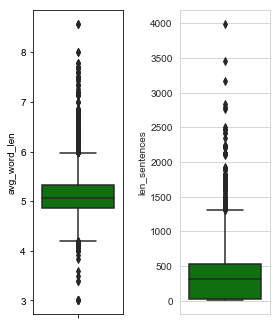

In [38]:
import seaborn as sns
l = ['avg_word_len', 'len_sentences']
number_of_columns = 2
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,6*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_nc[l[i]],color='green',orient='v')
    plt.tight_layout()

In [39]:
sum = 0
for x in range(1500, 4000, 1000 ):
    results = df_nc[df_nc['len_sentences'] > x]
    sum = sum + results['title '].size
    
amt = (sum/df_nc['title '].size)*100
print('Percentage of articles that have a word count of more than 1500 is {percent:.2f}%'.format(percent = amt))

Percentage of articles that have a word count of more than 1500 is 1.95%


/Users/marouf/anaconda3/envs/FakeNews/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


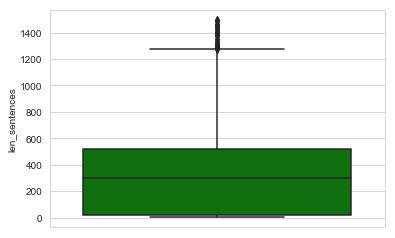

In [40]:
#articles of word count more than 1900 are thus being dropped
result_df = df_nc[df_nc['len_sentences']>=1500]

df_nc.drop(df_nc[df_nc['len_sentences'] >= 1500].index, inplace = True) 
sns.boxplot(df_nc['len_sentences'],color='green',orient='v')

In [41]:
df_nc.count()

title            2822
country          2822
label            2822
avg_word_len     2822
len_sentences    2822
source           2822
text             2822
date             2822
dtype: int64

In [42]:
df_nc.count()

title            2822
country          2822
label            2822
avg_word_len     2822
len_sentences    2822
source           2822
text             2822
date             2822
dtype: int64

In [43]:
X = df_nc.drop('label', axis=1)
y = df_nc['label']

In [44]:
df_nc['label']

0       False
1       False
2       False
3       False
4       False
        ...  
2896    True 
2897    True 
2898    True 
2899    True 
2900    True 
Name: label, Length: 2822, dtype: object

In [45]:
y

0       False
1       False
2       False
3       False
4       False
        ...  
2896    True 
2897    True 
2898    True 
2899    True 
2900    True 
Name: label, Length: 2822, dtype: object

In [46]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, shuffle=True)

In [48]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [49]:
X1_train = list(X_train['text'])
X1_val = list(X_val['text'])

In [50]:
X2_train = list(X_train['country'])
X2_val = list(X_val['country'])

In [51]:
def CreateEmbeddings(XN_train, XN_val, maxlength):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(XN_train)

  X1_train = tokenizer.texts_to_sequences(XN_train)
  X1_val = tokenizer.texts_to_sequences(XN_val)

  vocab_size = len(tokenizer.word_index) + 1

  maxlen = maxlength

  X1_train = pad_sequences(X1_train, padding='post', maxlen=maxlen)
  X1_val = pad_sequences(X1_val, padding='post', maxlen=maxlen)

  #prepare embeddings by GloVe
  embedding_index = {}
  f = open('../glove.6B/glove.6B.300d.txt')
  for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embedding_index[word] = coefs

  f.close()
  print('Found %s word vectors.' % len(embedding_index))

  embedding_matrix = np.zeros((vocab_size, 300))

  for word, i in tokenizer.word_index.items():
      embedding_vector = embedding_index.get(word)
      if embedding_vector is not None:
          #words not found in embedding index will be all-zero
          embedding_matrix[i] = embedding_vector

  return embedding_matrix, vocab_size, X1_train, X1_val


In [52]:
embedding_matrix, vocab_size, X1_train, X1_val = CreateEmbeddings(X1_train, X1_val, 1500)
embedding_matrix2, vocab_size2, X2_train, X2_val = CreateEmbeddings(X2_train, X2_val, 5)

Found 400001 word vectors.
Found 400001 word vectors.


In [53]:
print(vocab_size)
print(vocab_size2)
maxlen = 1500
maxlen2 = 5

24762
200


In [54]:
X3_train = X_train[['avg_word_len', 'len_sentences']]
X3_val = X_val[['avg_word_len', 'len_sentences']]

In [55]:
X4_train = X_train['date']
X4_val = X_val['date']

In [56]:
X3_train = np.asarray(X3_train)
X3_val = np.asarray(X3_val)

In [57]:
X4_train = np.asarray(X4_train)
X4_val = np.asarray(X4_val)

In [58]:
#input 1
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1 = LSTM(32)(embedding_layer)
  

#input 2
input_2 = Input(shape=(maxlen2,))
embedding_layer2 = Embedding(vocab_size2, 300, weights=[embedding_matrix2], trainable=False)(input_2)
LSTM_Layer_2 = LSTM(32)(embedding_layer2)
  
#input 3
input_3 = Input(shape=(2,))
dense_layer_1 = Dense(10, activation='relu')(input_3)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
dense_layer_3 = Dropout(0.0)(dense_layer_2)

#input 4
input_4 = Input(shape=(1,))
dense_layer_4 = Dense(10, activation='relu')(input_4)
dense_layer_5 = Dense(10, activation='relu')(dense_layer_4)
dense_layer_6 = Dropout(0.0)(dense_layer_5)

#concatenation
concat_layer = Concatenate()([LSTM_Layer_1, LSTM_Layer_2, dense_layer_3, dense_layer_6])

#output layer
output = Dense(2, activation='sigmoid')(concat_layer)

model = Model(inputs=[input_1, input_2, input_3, input_4], outputs=output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()




Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________

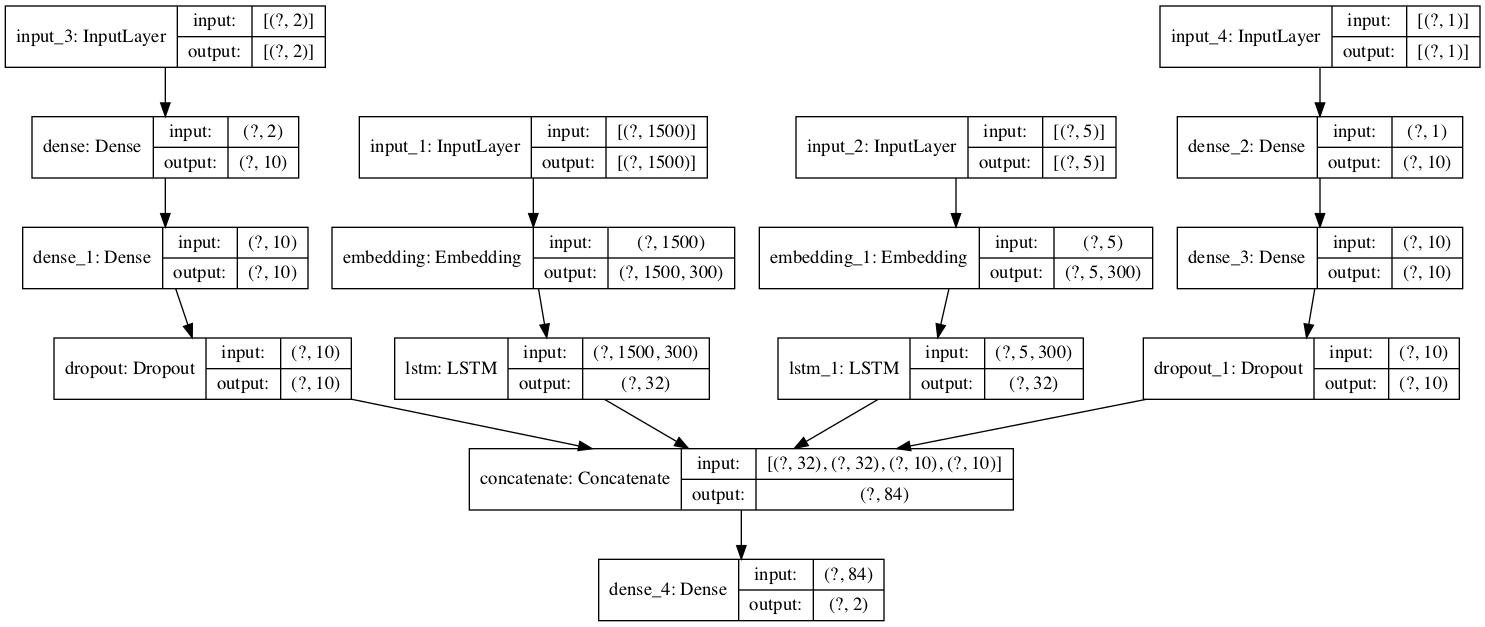

In [59]:
import tensorflow as tf


tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
  out = model.fit(x=x_train,
                      y=y_train, 
                      validation_data=[x_val, y_val],
                      batch_size=params['batch_size'],
                      epochs=params['epochs'],
                      verbose=1)

In [0]:
p = { 'neurons' : [32, 64, 128],
      'dense' : [10, 20, 30],
     'activation':['relu', 'elu'],
     'last_activation':['softmax', 'sigmoid'],
     'dropout' : [0, 0.1, 0.3],
     'batch_size' : [64, 128],
     'epochs' : [10, 30, 50],
     'optimizer':['nadam', 'adam']
     }

In [0]:
scan_object = talos.Scan(x=[X1_train, X2_train, X3_train, X4_train],
                         y=y_train,
                         x_val=[X1_val, X2_val, X3_val, X4_val],
                         y_val=y_val,
                         params=p,
                         model=lstm_model,
                         experiment_name="LSTM Model with spatial data")



  0%|          | 0/1296 [00:00<?, ?it/s]

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 5)]          0                                            
____________________________________________________________________________________________



  0%|          | 1/1296 [01:28<31:51:56, 88.58s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  0%|          | 2/1296 [02:48<30:55:02, 86.01s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  0%|          | 3/1296 [04:17<31:13:46, 86.95s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  0%|          | 4/1296 [05:44<31:13:44, 87.02s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  0%|          | 5/1296 [07:37<33:59:45, 94.80s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  0%|          | 6/1296 [09:28<35:39:38, 99.52s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  1%|          | 7/1296 [10:52<33:59:13, 94.92s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  1%|          | 8/1296 [12:13<32:26:02, 90.65s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  1%|          | 9/1296 [13:43<32:22:09, 90.54s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  1%|          | 10/1296 [15:11<32:03:54, 89.76s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  1%|          | 11/1296 [17:09<35:01:41, 98.13s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  1%|          | 12/1296 [19:01<36:28:41, 102.28s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  1%|          | 13/1296 [22:58<50:56:14, 142.93s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  1%|          | 14/1296 [26:54<60:47:37, 170.72s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  1%|          | 15/1296 [31:05<69:21:19, 194.91s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  1%|          | 16/1296 [35:15<75:10:12, 211.42s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  1%|▏         | 17/1296 [40:40<87:11:52, 245.44s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  1%|▏         | 18/1296 [45:58<94:50:21, 267.15s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  1%|▏         | 19/1296 [49:57<91:46:12, 258.71s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  2%|▏         | 20/1296 [53:52<89:11:40, 251.65s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  2%|▏         | 21/1296 [58:10<89:45:54, 253.45s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  2%|▏         | 22/1296 [1:02:24<89:48:59, 253.80s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  2%|▏         | 23/1296 [1:07:49<97:16:37, 275.10s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  2%|▏         | 24/1296 [1:13:15<102:32:58, 290.23s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  2%|▏         | 25/1296 [1:19:50<113:33:04, 321.62s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  2%|▏         | 26/1296 [1:26:19<120:39:54, 342.04s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  2%|▏         | 27/1296 [1:33:22<129:07:35, 366.32s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  2%|▏         | 28/1296 [1:40:24<134:52:37, 382.93s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  2%|▏         | 29/1296 [1:49:22<151:11:26, 429.59s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  2%|▏         | 30/1296 [1:58:11<161:29:41, 459.23s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  2%|▏         | 31/1296 [2:04:45<154:30:00, 439.68s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  2%|▏         | 32/1296 [2:11:20<149:41:37, 426.34s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  3%|▎         | 33/1296 [2:18:28<149:46:45, 426.92s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  3%|▎         | 34/1296 [2:25:35<149:38:41, 426.88s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  3%|▎         | 35/1296 [2:34:37<161:38:31, 461.47s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  3%|▎         | 36/1296 [2:43:30<169:01:49, 482.94s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  3%|▎         | 37/1296 [2:44:57<127:17:39, 363.99s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  3%|▎         | 38/1296 [2:46:29<98:42:14, 282.46s/it] 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  3%|▎         | 39/1296 [2:48:01<78:42:02, 225.40s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  3%|▎         | 40/1296 [2:49:30<64:23:24, 184.56s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  3%|▎         | 41/1296 [2:51:32<57:46:44, 165.74s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  3%|▎         | 42/1296 [2:53:32<52:52:41, 151.80s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  3%|▎         | 43/1296 [2:55:05<46:46:23, 134.38s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  3%|▎         | 44/1296 [2:56:39<42:27:39, 122.09s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  3%|▎         | 45/1296 [2:58:24<40:39:03, 116.98s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  4%|▎         | 46/1296 [2:59:56<37:59:38, 109.42s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  4%|▎         | 47/1296 [3:01:56<39:04:02, 112.60s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  4%|▎         | 48/1296 [3:04:06<40:50:06, 117.79s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  4%|▍         | 49/1296 [3:08:20<54:58:04, 158.69s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  4%|▍         | 50/1296 [3:12:28<64:16:05, 185.69s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  4%|▍         | 51/1296 [3:16:51<72:14:52, 208.91s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  4%|▍         | 52/1296 [3:21:15<77:50:29, 225.26s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  4%|▍         | 53/1296 [3:26:55<89:42:43, 259.83s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  4%|▍         | 54/1296 [3:32:25<96:53:43, 280.86s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  4%|▍         | 55/1296 [3:36:33<93:24:17, 270.96s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  4%|▍         | 56/1296 [3:40:43<91:09:56, 264.67s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  4%|▍         | 57/1296 [3:45:16<91:56:56, 267.16s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  4%|▍         | 58/1296 [3:49:52<92:48:08, 269.86s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________



  5%|▍         | 59/1296 [3:55:42<100:58:23, 293.86s/it]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1500)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________